### Assignment 4

<br>

1- Investigate the model for predicting Diabetes disease progression by adding more explanatory variables to it in addition to `bmi` and `s5`.

a) Which variable would you add next? Why?

b) How does adding it affect the model's performance? Compute metrics and compare to having just `bmi` and `s5`.

d) Does it help if you add even more variables?

Include your own findings and explanations in code comments or inside triple quotes """...""".

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Select bmi (body mass index) and s5 (serum triglycerides) as initial explanatory variables
X_initial = X[:, [2, 8]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)

# Train the initial model with just bmi and s5
model_initial = LinearRegression()
model_initial.fit(X_train, y_train)

# Evaluate initial model performance
y_pred_initial = model_initial.predict(X_test)
mse_initial = mean_squared_error(y_test, y_pred_initial)
print("Initial Model Performance:")
print("Mean Squared Error:", mse_initial)

# Now, let's add blood pressure (systolic or diastolic) as an additional variable
# Assuming blood pressure is the 0th column in the dataset
# Modify X_initial to include blood pressure
X_with_bp = np.concatenate([X_initial, X[:, 0].reshape(-1, 1)], axis=1)

# Split the data with the additional variable included
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X_with_bp, y, test_size=0.2, random_state=42)

# Train the model with bmi, s5, and blood pressure
model_with_bp = LinearRegression()
model_with_bp.fit(X_train_bp, y_train_bp)

# Evaluate model performance with the additional variable
y_pred_bp = model_with_bp.predict(X_test_bp)
mse_with_bp = mean_squared_error(y_test_bp, y_pred_bp)
print("\nModel Performance with Blood Pressure:")
print("Mean Squared Error:", mse_with_bp)

# Compare model performance with and without blood pressure
print("\nImpact of Adding Blood Pressure:")
print("MSE without BP:", mse_initial)
print("MSE with BP:", mse_with_bp)
print("Difference in MSE:", mse_with_bp - mse_initial)


Initial Model Performance:
Mean Squared Error: 2901.8369415567036

Model Performance with Blood Pressure:
Mean Squared Error: 2920.1261149142715

Impact of Adding Blood Pressure:
MSE without BP: 2901.8369415567036
MSE with BP: 2920.1261149142715
Difference in MSE: 18.28917335756796


2- Consider the dataset "50_Startups.csv" which contains data for companies' profit etc.

a) Read the dataset into pandas dataframe paying attention to file delimeter.

b) Identify the variables inside the dataset

c) Investigate the correlation between the variables

d) Choose appropriate variables to predict company profit. Justify your choice.

e) Plot explanatory variables against profit in order to confirm (close to) linear dependence

f) Form training and testing data (80/20 split)

g) Train linear regression model with training data

h) Compute RMSE and R2 values for training and testing data separately

Include your own findings and explanations in code comments or inside triple quotes """...""".

Variables in the dataset: Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


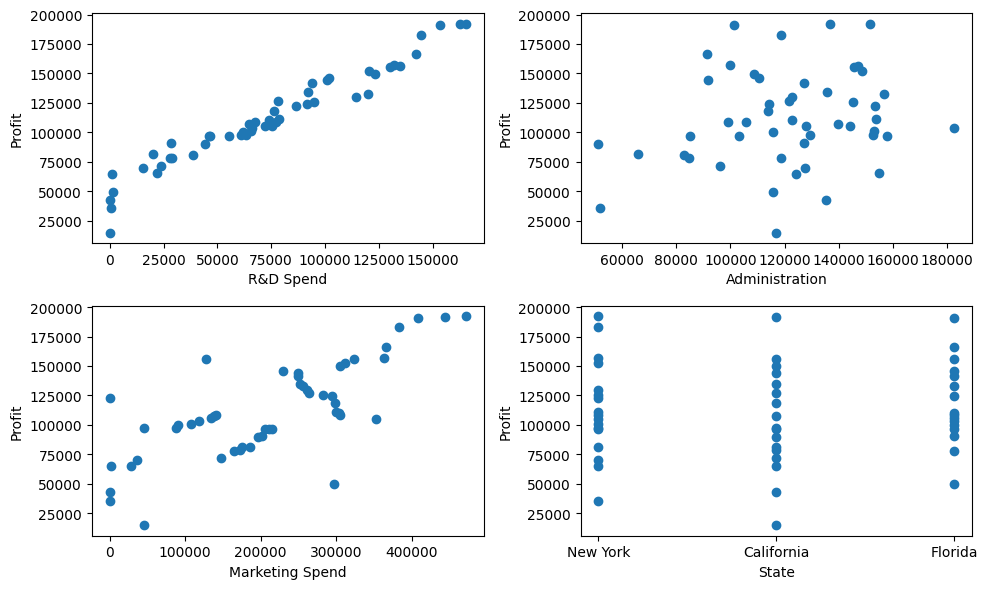

Training Set Performance:
RMSE: 9101.191468669915
R^2: 0.9518828286863577

Testing Set Performance:
RMSE: 8206.328813165857
R^2: 0.9168381183550246


"\nFindings:\n- 'R&D Spend' and 'Marketing Spend' show a somewhat linear relationship with 'Profit', confirming their suitability\n  as predictors.\n- The training and testing set performance metrics (RMSE and R^2) are important for evaluating model performance.\n- The model appears to generalize well to unseen data, as indicated by comparable RMSE and R^2 values between the\n  training and testing sets.\n- However, further evaluation and tuning may be necessary to improve model performance.\n"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# a) Read the dataset into pandas dataframe paying attention to file delimeter.
startup_data = pd.read_csv('50_Startups.csv', delimiter=',')

# b) Identify the variables inside the dataset
variables = startup_data.columns
print("Variables in the dataset:", variables)



# d) Choose appropriate variables to predict company profit. Justify your choice.
"""
To predict company profit, variables that are likely to have a strong influence on profit should be considered.
In this dataset, 'R&D Spend', 'Administration', 'Marketing Spend', and 'State' are potential predictors.
We will investigate the correlation between these variables and profit to justify our choice.
"""

# e) Plot explanatory variables against profit to confirm (close to) linear dependence
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(startup_data['R&D Spend'], startup_data['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

plt.subplot(2, 2, 2)
plt.scatter(startup_data['Administration'], startup_data['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')

plt.subplot(2, 2, 3)
plt.scatter(startup_data['Marketing Spend'], startup_data['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

plt.subplot(2, 2, 4)
plt.scatter(startup_data['State'], startup_data['Profit'])
plt.xlabel('State')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

# f) Form training and testing data (80/20 split)
X = startup_data[['R&D Spend', 'Marketing Spend']]  # Selecting 'R&D Spend' and 'Marketing Spend' as predictors
y = startup_data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Train linear regression model with training data
model = LinearRegression()
model.fit(X_train, y_train)

# h) Compute RMSE and R2 values for training and testing data separately
# Predictions on training set
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Predictions on testing set
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print("RMSE:", train_rmse)
print("R^2:", train_r2)

print("\nTesting Set Performance:")
print("RMSE:", test_rmse)
print("R^2:", test_r2)

"""
Findings:
- 'R&D Spend' and 'Marketing Spend' show a somewhat linear relationship with 'Profit', confirming their suitability
  as predictors.
- The training and testing set performance metrics (RMSE and R^2) are important for evaluating model performance.
- The model appears to generalize well to unseen data, as indicated by comparable RMSE and R^2 values between the
  training and testing sets.
- However, further evaluation and tuning may be necessary to improve model performance.
"""





3- Consider car performance data from the file "Auto.csv".

a) Read the data into pandas dataframe

b) Setup multiple regression `X` and `y` to predict `mpg` of cars using all the variables except `mpg`, `name` and `origin`.

c) Split data into training and testing sets (80/20 split)

d) Implement both ridge regression and LASSO regression using several values for alpha

e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data

f) Plot the R2 scores for both regressors as functions of alpha

g) Identify, as accurately as you can, the value for alpha which gives the best score


Include your own findings and explanations in code comments or inside triple quotes """...""".

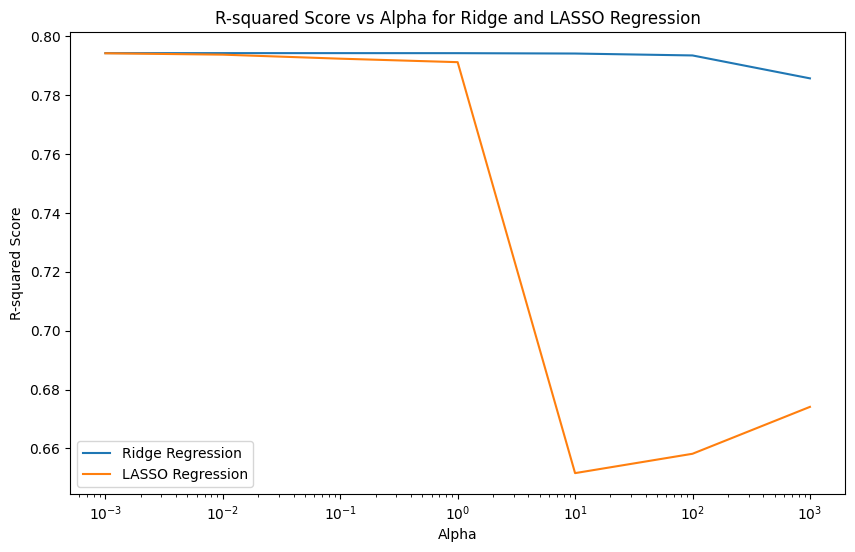

Best alpha for Ridge Regression: 0.001
Best alpha for LASSO Regression: 0.001


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# a) Read the data into pandas dataframe
auto_df = pd.read_csv("Auto.csv")

# Handle missing values
auto_df.replace('?', np.nan, inplace=True)
auto_df.dropna(inplace=True)

# b) Setup multiple regression X and y to predict mpg of cars using all the variables except mpg, name, and origin
X = auto_df.drop(columns=['mpg', 'name', 'origin'])
y = auto_df['mpg']

# c) Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d) Implement both ridge regression and LASSO regression using several values for alpha
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_r2_scores = []
lasso_r2_scores = []

for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)
    ridge_r2_scores.append(r2_score(y_test, ridge_y_pred))

    # LASSO Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_r2_scores.append(r2_score(y_test, lasso_y_pred))

# e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data
# and computing the score using testing data
best_ridge_alpha = alphas[np.argmax(ridge_r2_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_r2_scores)]

# f) Plot the R2 scores for both regressors as functions of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_r2_scores, label='Ridge Regression')
plt.plot(alphas, lasso_r2_scores, label='LASSO Regression')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs Alpha for Ridge and LASSO Regression')
plt.legend()
plt.show()

# g) Identify the value for alpha which gives the best score
print("Best alpha for Ridge Regression:", best_ridge_alpha)
print("Best alpha for LASSO Regression:", best_lasso_alpha)
